In [6]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from sklearn import datasets

from collections import Counter

from sklearn.datasets.samples_generator import make_blobs

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Sample Data
make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

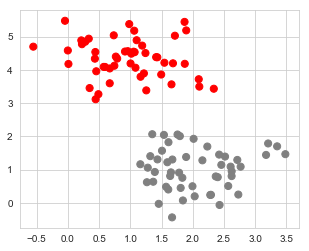

In [14]:
sample_data, sample_target = make_blobs(n_samples=100, centers=2, cluster_std=0.60, random_state=0)

color_theme = np.array(['red','grey','blue','black','yellow'])

plt.scatter(sample_data[:, 0], sample_data[:, 1],  c=color_theme[sample_target], s=50);

## Building and Running DBSCAN Model
DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

In [15]:
model = DBSCAN(eps = 0.8, min_samples = 19).fit(sample_data)
print model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


## Visualize Results

In [16]:
print Counter(model.labels_)

Counter({0: 46, 1: 43, -1: 11})


In [17]:
outliers = pd.DataFrame(sample_data[model.labels_==-1])
outliers

,0,1
0,3.353209,1.699580
1,0.443599,3.115309
2,3.209033,1.785973
3,3.485154,1.464351
4,1.895938,5.185403
5,-0.047492,5.474253
6,1.869221,5.441321
7,2.338123,3.431168
8,2.106160,3.495132
9,3.175803,1.441290


Text(0.5,1,'DBSCAN for Outliers Detection')

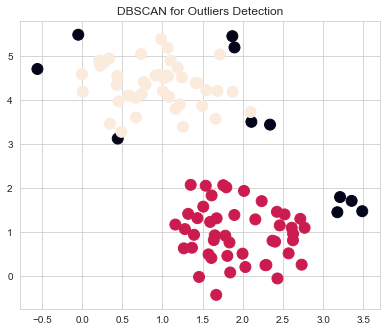

In [19]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(sample_data[:,0], sample_data[:,1], c=colors, s=120)

plt.title('DBSCAN for Outliers Detection')